In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

# 读入数据
X, y = load_svmlight_file('australian_scale.txt')

# 将X转为多维数组，同时将偏移量b放到W中，因此为X添加一列
X = X.toarray()
X = np.c_[X, np.ones((X.shape[0], 1))]
y = y.reshape(y.shape[0], 1)

# 对数据进行切分，分为训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
# 初始化参数、阈值和迭代次数
W = np.zeros((X.shape[1], 1))
ETA = 0.0001
C = 1
threshold = 0
iteration_time = 100

损失函数：$Loss = \frac{\|W\|^2 }{2} + C \sum_{i = 1}^n max(0, 1 - y_i(W'x_i + b))$

In [5]:
# 定义保存训练集损失值、验证集损失值和正确率的列表
train_loss_list = []
test_loss_list = []
right_rate_list = []

# 定义一个全为0的数组，后面求导的时候会用到
zero_array = np.zeros((W.shape[0], 1))

# 进行迭代
for item in range(0, iteration_time):
    # 对损失函数进行求导，得到梯度
    Hinge_loss_gradient = np.zeros(W.shape)
    for index in range(0, y_train.shape[0]):
        Xi = X_train[index].reshape(1, X_train.shape[1]).T
        Yi = y_train[index][0]
        
        if (1 - Yi * np.dot(W.T, Xi)[0][0] > 0):
            Hinge_loss_gradient -= Yi * Xi
        else:
            Hinge_loss_gradient += zero_array
    
    
    gradient = W + C * Hinge_loss_gradient
    # 利用损失函数的梯度更新W
    W = W - ETA * gradient
    
    
    # 计算在训练集上的损失值并保存到列表中
    Hinge_loss_sum = 0
    for index in range(0, y_train.shape[0]):
        Xi = X_train[index].reshape(1, X_train.shape[1]).T
        Yi = y_train[index][0]
        
        Hinge_loss = 1 - Yi * np.dot(W.T, Xi)[0][0]
        if (Hinge_loss > 0):
            Hinge_loss_sum += Hinge_loss
        else:
            Hinge_loss_sum += 0
    
    train_loss = 1/2 * np.dot(W.T, W)[0][0] + C * Hinge_loss_sum
    train_loss_list.append(train_loss)
    
    
    # 计算验证集上的损失值和正确率并保存到列表中
    right_counter = 0
    Hinge_loss_sum = 0
    for index in range(0, y_test.shape[0]):
        Xi = X_test[index].reshape(1, X_test.shape[1]).T
        Yi = y_test[index][0]
        
        WTXi = np.dot(W.T, Xi)[0][0]
        
        Hinge_loss = 1 - Yi * WTXi
        if (Hinge_loss > 0):
            Hinge_loss_sum += Hinge_loss
        else:
            Hinge_loss_sum += 0 
            
        # 根据阈值threshold进行判断分类，并记录分类正确的个数
        predict = -1    # 初始化预测值为负类
        if (WTXi > threshold):
            predict = 1
            
        if (predict == Yi):
            right_counter += 1
            
    right_rate = right_counter / y_test.shape[0]
    right_rate_list.append(right_rate)
    
    test_loss = 1/2 * np.dot(W.T, W)[0][0] + C * Hinge_loss_sum
    test_loss_list.append(test_loss)

In [6]:
# 输出正确率列表
print("The right rate list: ", right_rate_list)

The right rate list:  [0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.815028901734104, 0.8208092485549133, 0.8208092485549133, 0.8265895953757225, 0.8439306358381503, 0.8323699421965318, 0.8265895953757225, 0.8323699421965318, 0.8323699421965318, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 0.838150289017341, 

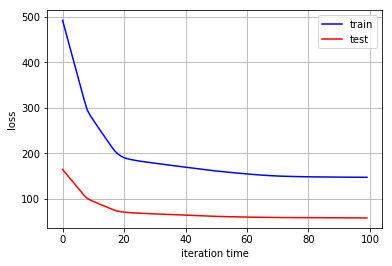

In [7]:
# 将从训练集和验证集上得到的损失值列表画成图像
import matplotlib.pyplot as plt

plt.xlabel('iteration time')
plt.ylabel('loss')

x = range(len(train_loss_list))
plt.plot(x, train_loss_list, 'b-', label = 'train')

x = range(len(test_loss_list))
plt.plot(x, test_loss_list, 'r-', label = 'test')

plt.grid(True)
plt.legend()
plt.show()